## converting mayo clinic first aid to dataframe and translating it to arabic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r "./drive/MyDrive/Colab Notebooks/NLP-second term/datasets/mayo clinic first aid" .

Mounted at /content/drive


In [ ]:
import os
import json
import pandas as pd

directory_path = './mayo clinic first aid'

questions = []
answers = []
tags = []

for filename in os.listdir(directory_path):
    if filename.endswith('.json'):
        with open(os.path.join(directory_path, filename), 'r') as f:
            json_data = json.load(f)
        situation = json_data['situation'].lower()
        for qna in json_data['questions']:
            questions.append(qna['question'])
            answers.append(qna['answer'])
            tags.append(situation)

df = pd.DataFrame({'question': questions, 'answer': answers, 'tags': tags})

In [ ]:
df

,question,answer,tags
0,What are heat cramps?,"Heat cramps are painful, involuntary muscle sp...",heat cramps
1,What contributes to heat cramps?,Fluid and electrolyte loss often contribute to...,heat cramps
2,Which muscles are most often affected by heat ...,Muscles most often affected include those of y...,heat cramps
3,What should you do if you suspect heat cramps?,"Rest briefly and cool down, drink clear juice ...",heat cramps
4,When should you call your doctor if you have h...,You should call your doctor if your cramps don...,heat cramps
...,...,...,...
369,How should you gently rewarm frostbitten areas?,"Soak frostbitten fingers, toes or other extrem...",frostbite
370,What should you avoid when rewarming frostbitt...,Don't rewarm frostbitten skin with direct heat...,frostbite
371,What should you drink to help warm yourself fr...,"Drink warm liquids like tea, coffee, hot choco...",frostbite
372,Should you consider taking pain medicine for f...,"If you're in pain, consider an over-the-counte...",frostbite


In [ ]:
!pip install transformers sentencepiece 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-tc-big-en-ar")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-tc-big-en-ar")
# Load the translation pipeline
translator = pipeline('translation_en_to_ar', model=model,tokenizer=tokenizer)

/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
def translate_text(text):
  return translator(text)[0]['translation_text']
translate_text('hello')

'مرحبا'

In [ ]:
df_ar = pd.DataFrame()
df_ar['question'] = df['question'].apply(translate_text)
df_ar['answer'] = df['answer'].apply(translate_text)
df_ar['tag'] = df['tag'].apply(translate_text)

In [ ]:
df_ar

,question,answer,tags
0,ما هي بعض الأعراض التي تشير إلى وجود مشكلة طبي...,الصداع الذي لا يتم شرحه ، والصداع الذي يزداد س...,headache
1,متى يجب أن أطلب العناية الطبية الفورية للصداع؟,يجب عليك طلب العناية الطبية الفورية للصداع إذا...,headache
2,ما هي بعض الحالات الأخرى التي يجب أن أطلب فيها...,يجب عليك أيضًا طلب العناية الطبية إذا كان الصد...,headache
3,ماذا أفعل إذا تعرضت للعض من قبل القراد؟,قم بإزالة القراد على الفور وبعناية باستخدام مل...,tick bites
4,متى يجب علي طلب الرعاية الطارئة بعد لدغة القراد؟,اتصل بالرقم 911 أو رقم الطوارئ المحلي إذا كنت ...,tick bites
...,...,...,...
369,متى يجب عليك طلب المساعدة الطبية الفورية لجسم ...,إذا بدا أن الجسم الغريب أكثر عمقًا في الجلد أو...,foreign object in the skin
370,ماذا أفعل إذا تسربت مادة كيميائية إلى عيني؟,اغمر عينيك بماء الصنبور النظيف والفاتر لمدة 20...,chemical splash in the eye
371,ماذا علي أن أفعل بعد غسل عيني؟,اغسل يديك بالماء والصابون لإزالة أي مادة كيميا...,chemical splash in the eye
372,ماذا يجب أن أفعل إذا تسربت مادة كيميائية إلى ع...,لا تفرك عينك لأنها قد تسبب المزيد من الضرر. لا...,chemical splash in the eye


In [ ]:
df = df_en

In [ ]:
df = df_ar

In [ ]:
df_ar = df

In [ ]:
df_en = df

In [ ]:
#@title saving df variable in form of csv
import pandas as pd
from google.colab import drive
import os, glob

drive.mount('/content/drive')
file_name="arabic-dataframe.csv"#@param {type:"string"}
current_colab_name="making complete model using mayo clinic first aid.ipynb"#@param {type:"string"}

if 'my_path' not in locals():
    my_path = glob.glob(os.getcwd() + '/**/' + current_colab_name, recursive=True)
    my_path = [my_i for my_i in my_path if len(my_i) in [max([len(my_i) for my_i in my_path])]][0]

df.to_csv(os.path.dirname(my_path)+"/"+file_name, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title loading df variable
import pandas as pd
from google.colab import drive
import os, glob

drive.mount('/content/drive')
file_name="arabic-dataframe.csv"#@param {type:"string"}
current_colab_name="making complete model using mayo clinic first aid.ipynb"#@param {type:"string"}

if 'my_path' not in locals():
    my_path = glob.glob(os.getcwd() + '/**/' + current_colab_name, recursive=True)
    my_path = [my_i for my_i in my_path if len(my_i) in [max([len(my_i) for my_i in my_path])]][0]
df = pd.read_csv(os.path.dirname(my_path)+"/"+file_name)

Mounted at /content/drive


## arabic sentence transformers

In [ ]:
!pip install sentence-transformers

In [ ]:
!pip install pyarabic
!pip install farasapy

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load the pre-trained model
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
#model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Define a source sentence and a list of target sentences
source_sentence = 'ما هو المدة الزمنية المعتادة التي يستمر فيها ألم الصدر خلال نوبة قلبية؟'
#source_sentence = 'what is heart attack'
target_sentences = df[df['tags'].isin(["heart attack"])]['question'].tolist()

# Encode the source and target sentences
source_embedding = model.encode(source_sentence, convert_to_tensor=True)
target_embeddings = model.encode(target_sentences, convert_to_tensor=True)

# Compute the similarity scores
similarity_scores = util.pytorch_cos_sim(source_embedding, target_embeddings)

# Sort the target sentences by their similarity score
sorted_indices = similarity_scores.argsort(descending=True)[0]
sorted_targets = [target_sentences[i] for i in sorted_indices]

# Print the sorted target sentences and their similarity scores
print("Sorted target sentences:")
for i in range(len(sorted_targets)):
    print(f"{i+1}. {sorted_targets[i]} (similarity score: {similarity_scores[0][sorted_indices[i]].item():.4f})")


Sorted target sentences:
1. كم من الوقت يستمر ألم الصدر عادة أثناء نوبة قلبية؟ (similarity score: 0.9357)
2. ما هي أعراض النوبة القلبية؟ (similarity score: 0.5371)
3. ما الذي يجب عليك فعله أثناء انتظار وصول المساعدة الطارئة أثناء نوبة قلبية؟ (similarity score: 0.5319)
4. ماذا تفعل إذا كنت تعتقد أنك أو أي شخص آخر يعاني من نوبة قلبية؟ (similarity score: 0.4689)
5. ماذا تفعل إذا كان الشخص الذي يعاني من نوبة قلبية فاقد الوعي؟ (similarity score: 0.4583)


In [ ]:
df[df['tags'].isin(["heart attack"])]['question']

91                          ما هي أعراض النوبة القلبية؟
92    كم من الوقت يستمر ألم الصدر عادة أثناء نوبة قل...
93    ماذا تفعل إذا كنت تعتقد أنك أو أي شخص آخر يعان...
94    ماذا تفعل إذا كان الشخص الذي يعاني من نوبة قلب...
95    ما الذي يجب عليك فعله أثناء انتظار وصول المساع...
Name: question, dtype: object

## building the conversation model for arabic

In [ ]:
pairs = [
    (r"مرحبا|السلام عليكم|اهلا", ["مرحبا! كيف يمكنني مساعدتك؟", "السلام عليكم! أهلا وسهلا بك."]),
    (r"كيف حالك؟", ["أنا بخير، شكرا. وأنت؟", "بخير، شكرا. كيف حالك؟"]),
    (r"أنا بخير|بخير|تمام", ["سعيد بسماع ذلك.", "جيد أنك بخير."]),
    (r"شكرا|شكرا جزيلا|أشكرك", ["على الرحب والسعة!", "أنا دائما في الخدمة."]),
    (r"ما هو اسمك؟", ["اسمي Blu.", "أنا Blu، الدردشة الطبية."]),
    (r"ماذا تفعل؟", ["أنا برنامج دردشة طبي يمكنني مساعدتك في أي سؤال طبي."]),
    (r"ما هي الخدمات التي تقدمها؟", ["يمكنني الإجابة على الأسئلة الطبية والمساعدة في الحصول على المعلومات الصحية."]),
    (r"من أنت؟", ["أنا برنامج دردشة طبي يمكنني مساعدتك في أي سؤال طبي."]),
    (r"هل تستطيع مساعدتي؟", ["بالتأكيد! أي سؤال طبي لديك؟"]),
    (r"كيف يمكنني الحفاظ على صحتي؟", ["يمكنك الحفاظ على صحتك عن طريق ممارسة الرياضة بانتظام وتناول الطعام الصحي."]),
    (r"هل يمكنك مساعدتي في العثور على مستشفى؟", ["نعم، بالتأكيد. ما هي مدينتك؟"]),
    (r"هل يمكنك مساعدتي في الحصول على معلومات الصحية؟", ["بالتأكيد! يمكنني توفير المعلومات الصحية اللازمة."]),
    (r"كيف يمكنني الحفاظ على وزن صحي؟", ["يمكنك الحفاظ على وزن صحي عن طريق تناول الأطعمة الصحية وممارسة الرياضة بانتظام."]),
    (r"ما هو الغذاء الصحي؟", ["الغذاء الصحي يتضمن تناول الفواكه والخضروات والبروتينات الصحية."]),
    (r"كم ساعة يجب أن أنام في الليل؟", ["ينصح بالنوم لمدة 7-9 ساعات في الليل."]),
    (r"هل يمكنك مساعدتي في الحصول على تشخيص؟", ["لا يمكنني تشخيص حالتك عن بعد. يرجى استشارة الطبيب الخاص بك."]),
    (r"كيف يمكنني التعامل مع الإجهاد؟", ["يمكنك التعامل مع الإجهاد عن طريق ممارسة اليوغا وتناول الطعام الصحي."]),
    (r"كم عمرك؟", ["أنا برنامج دردشة طبي ولا يوجد عمر لي."]),
    (r"شكرا لك|شكرا جزيلا", ["على الرحب والسعة!", "أنا دائما في الخدمة."]),
    (r"وداعا|إلى اللقاء", ["وداعا! تحقق دائمًا من صحتك."])
    ]
reflections = {
"أنا": "أنت",
"أنت": "أنا",
"لي": "لك",
"كنت": "كنت",
"أريد": "أريد",
"ي": "أنا"
}
nltk_chatbot = Chat(pairs, reflections)

In [ ]:
!pip install pyarabic farasapy arabert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.chat.util import Chat, reflections
from transformers import Conversation, EncoderDecoderModel, AutoTokenizer

# Load the tokenizer and model
#https://github.com/aub-mind/Arabic-Empathetic-Chatbot
#https://huggingface.co/tareknaous/bert2bert-empathetic-response-msa
tokenizer = AutoTokenizer.from_pretrained("tareknaous/bert2bert-empathetic-response-msa")
model = EncoderDecoderModel.from_pretrained("tareknaous/bert2bert-empathetic-response-msa")
model.eval()

In [ ]:
from arabert.preprocess import ArabertPreprocessor
arabert_prep = ArabertPreprocessor(model_name="bert-base-arabert", keep_emojis=False)

/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


100%|██████████| 241M/241M [00:37<00:00, 6.42MiB/s]


[2023-04-20 11:13:58,839 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
def generate_response(text):
    # Check if the user input matches any pattern in NLTK chatbot pairs
    nltk_response = nltk_chatbot.respond(text)
    if nltk_response:
        return nltk_response

    text_clean = arabert_prep.preprocess(text)
    inputs = tokenizer.encode_plus(text_clean,return_tensors='pt')
    outputs = model.generate(input_ids = inputs.input_ids,
                    attention_mask = inputs.attention_mask,
                    do_sample = True,
                    top_k = 3,
                    top_p = 0.9,
                    temperature = 0.3)
    preds = tokenizer.batch_decode(outputs) 
    response = str(preds)
    response = response.replace("\'", '')
    response = response.replace("[[CLS]", '')
    response = response.replace("[SEP]]", '')
    response = str(arabert_prep.desegment(response))
    return response

In [ ]:
generate_response("اهلا")

'مرحبا! كيف يمكنني مساعدتك؟'

In [ ]:
generate_response("انا لا اشعر اني بخير")

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (64) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


' أنا متأكد من أن كستبلي بلاء حسنا. '

In [ ]:
generate_response("انا حاسس اني مش كويس")

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1286: UserWarning: Using `max_length`'s default (64) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  model_kwargs = self._prepare_encoder_decoder_kwargs_for_generation(


' أنا آسف لسماع ذلك. '

## building the conversation model for english

In [ ]:
pairs = [
    (r"hi|hey|hello|howdy|hey there", 
     ["Hi there! I'm Blu, your first aid chatbot. How can I help you today?"]),
    (r"what (?:can|do) you do|what are you capable of",
     ["I can help you with first aid information and emergencies. Try asking me a question!"]),
    (r"who (?:created|made) you",
     ["I was created by a team of developers who wanted to make first aid information more accessible."]),
    (r"what's up|sup", ["Not much, just here to help. How about you?"]),
    (r"what is your name|who are you",
     ["My name is Blu, and I'm here to help with your first aid needs."]),
    (r"how are you|how (?:'re|are) you doing",
     ["As an AI chatbot, I don't have feelings in the way humans do, but I'm always ready to help!"]),
    (r"i need help|help me",
     ["Of course, what do you need help with?"]),
    (r"goodbye|bye|see you later",
     ["Goodbye! Stay safe."]),
    (r'thank you', ['You\'re welcome!', 'No problem.', 'Anytime!']),
    (r'i appreciate it', ['Glad I could help!', 'You\'re welcome.']),
    ("do you like me", ["I'm just a machine, I don't have feelings, but I'm here to help you!", "I don't have the ability to like or dislike, but I'm here to assist you in any way I can!"]),
    ("what can you do", ["I can help you with first aid and basic medical questions.", "I can provide advice for minor injuries and illnesses.", "I can give you tips on how to stay healthy."]),
    ("where are you from", ["I'm a chatbot, I don't have a physical location!"]),
    ("how old are you", ["I was just recently created, so I'm brand new!"]),
    ("what's the weather like", ["I'm sorry, I'm not able to check the weather. You can check a weather app on your phone!"]),
    ("what's the time", ["I'm sorry, I'm not able to tell the time. You can check your phone or watch for the current time."]),
]

reflections = {
    "i am": "you are",
    "i was": "you were",
    "i": "you",
    "i'm": "you're",
    "i'd": "you would",
    "i've": "you have",
    "i'll": "you will",
    "my": "your",
    "you are": "I am",
    "you were": "I was",
    "you": "I",
    "you're": "I'm",
    "you'd": "I would",
    "you've": "I have",
    "you'll": "I will",
    "your": "my",
    "yours": "mine",
    "me": "you"
}
nltk_chatbot = Chat(pairs, reflections)

In [ ]:
import nltk
from nltk.chat.util import Chat, reflections
from transformers import Conversation, pipeline

# Load the tokenizer and model
empathymodel = pipeline("conversational","facebook/blenderbot-400M-distill")

In [ ]:
conversation= Conversation()

In [ ]:
def generate_response(text, conversation):
    nltk_response = nltk_chatbot.respond(text)
    if nltk_response:
        return nltk_response
    conversation.add_user_input(text)
    conversation = empathymodel(conversation)
    return conversation.generated_responses[-1]

In [ ]:
generate_response("hello" ,conversation)

"Hi there! I'm Blu, your first aid chatbot. How can I help you today?"

In [ ]:
generate_response("i am not feeling well",conversation)

" Oh, I'm sorry to hear that. I hope you feel better soon. What's wrong?"

## detect if language is arabic or english

In [ ]:
import re

def detect_language(text):
    arabic_pattern = re.compile("[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF]+")
    english_pattern = re.compile("[A-Za-z]+")

    if arabic_pattern.search(text):
        return "arabic"
    elif english_pattern.search(text):
        return "english"
    else:
        return "Unknown"

In [ ]:
detect_language('hello')

'english'

In [ ]:
detect_language('اهلا')

'arabic'

## training arabic intent classifier

In [ ]:
!pip install transformers datasets

from transformers import AutoTokenizer
from datasets import load_dataset
import pandas as pd

#model_name = 'bert-base-multilingual-cased'
model_name = 'aubmindlab/bert-base-arabertv2'

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the dataset
dataset = load_dataset("SetFit/amazon_massive_intent_ar-SA")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(dataset['train'])

In [ ]:
df

,id,label,text,label_text,label_text_ar
0,1,48,صحيني تسعة الصباح يوم الجمعة,alarm_set,مجموعة التنبيه
1,2,48,حط منبه بعد ساعتين من الحين,alarm_set,مجموعة التنبيه
2,4,46,olly هدوء,audio_volume_mute,كتم الصوت
3,5,46,وقف,audio_volume_mute,كتم الصوت
4,6,46,أوللي وقف مؤقتاً لمدة عشر ثواني,audio_volume_mute,كتم الصوت
...,...,...,...,...,...
11509,17175,17,أرسل مرحبا في watsapp إلى vikki,email_querycontact,الاستعلام عن البريد الإلكتروني
11510,17176,44,ابي أعرف اذا وصلتني ايميلات,email_query,استعلام عن البريد الإلكتروني
11511,17177,44,وش الإيميلات الجديدة,email_query,استعلام عن البريد الإلكتروني
11512,17178,44,هل عندي ايميلات جديدة من فيصل,email_query,استعلام عن البريد الإلكتروني


In [ ]:
# Create a dictionary mapping label index to label name
label_dict = dict(df[["label", "label_text"]].drop_duplicates().values)
label_dict = dict(sorted(label_dict.items()))

label_map  = [None] * len(label_dict)
for key, value in label_dict.items():
    label_map [key] = value

print(label_map )

['datetime_query', 'iot_hue_lightchange', 'transport_ticket', 'takeaway_query', 'qa_stock', 'general_greet', 'recommendation_events', 'music_dislikeness', 'iot_wemo_off', 'cooking_recipe', 'qa_currency', 'transport_traffic', 'general_quirky', 'weather_query', 'audio_volume_up', 'email_addcontact', 'takeaway_order', 'email_querycontact', 'iot_hue_lightup', 'recommendation_locations', 'play_audiobook', 'lists_createoradd', 'news_query', 'alarm_query', 'iot_wemo_on', 'general_joke', 'qa_definition', 'social_query', 'music_settings', 'audio_volume_other', 'calendar_remove', 'iot_hue_lightdim', 'calendar_query', 'email_sendemail', 'iot_cleaning', 'audio_volume_down', 'play_radio', 'cooking_query', 'datetime_convert', 'qa_maths', 'iot_hue_lightoff', 'iot_hue_lighton', 'transport_query', 'music_likeness', 'email_query', 'play_music', 'audio_volume_mute', 'social_post', 'alarm_set', 'qa_factoid', 'calendar_set', 'play_game', 'alarm_remove', 'lists_remove', 'transport_taxi', 'recommendation_mov

In [ ]:
def preprocess(example):
    example["input_ids"] = tokenizer.encode(example["text"], add_special_tokens=True)
    example["attention_mask"] = [1] * len(example["input_ids"])
    example["label"] = example["label"]
    return example

dataset = dataset.map(preprocess)

In [ ]:
train_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

In [ ]:
import torch

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Load the pre-trained model and add a classification head
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_map),id2label=label_dict).to(device)

#for name, param in model.named_parameters():
#    if 'classifier' not in name:  # Only fine-tune the top layers
#        param.requires_grad = False

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.03,
    push_to_hub=False,
    logging_dir='./logs',
    logging_steps=10
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

# Fine-tune the model on the train set
trainer.train()

# Evaluate the model on the validation set
trainer.evaluate()

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv2 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were

Epoch,Training Loss,Validation Loss
1,1.838000,1.443508
2,0.941700,0.952541
3,0.691100,0.828776


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7038, Precision: 0.5348, Recall: 0.5266


<Axes: >

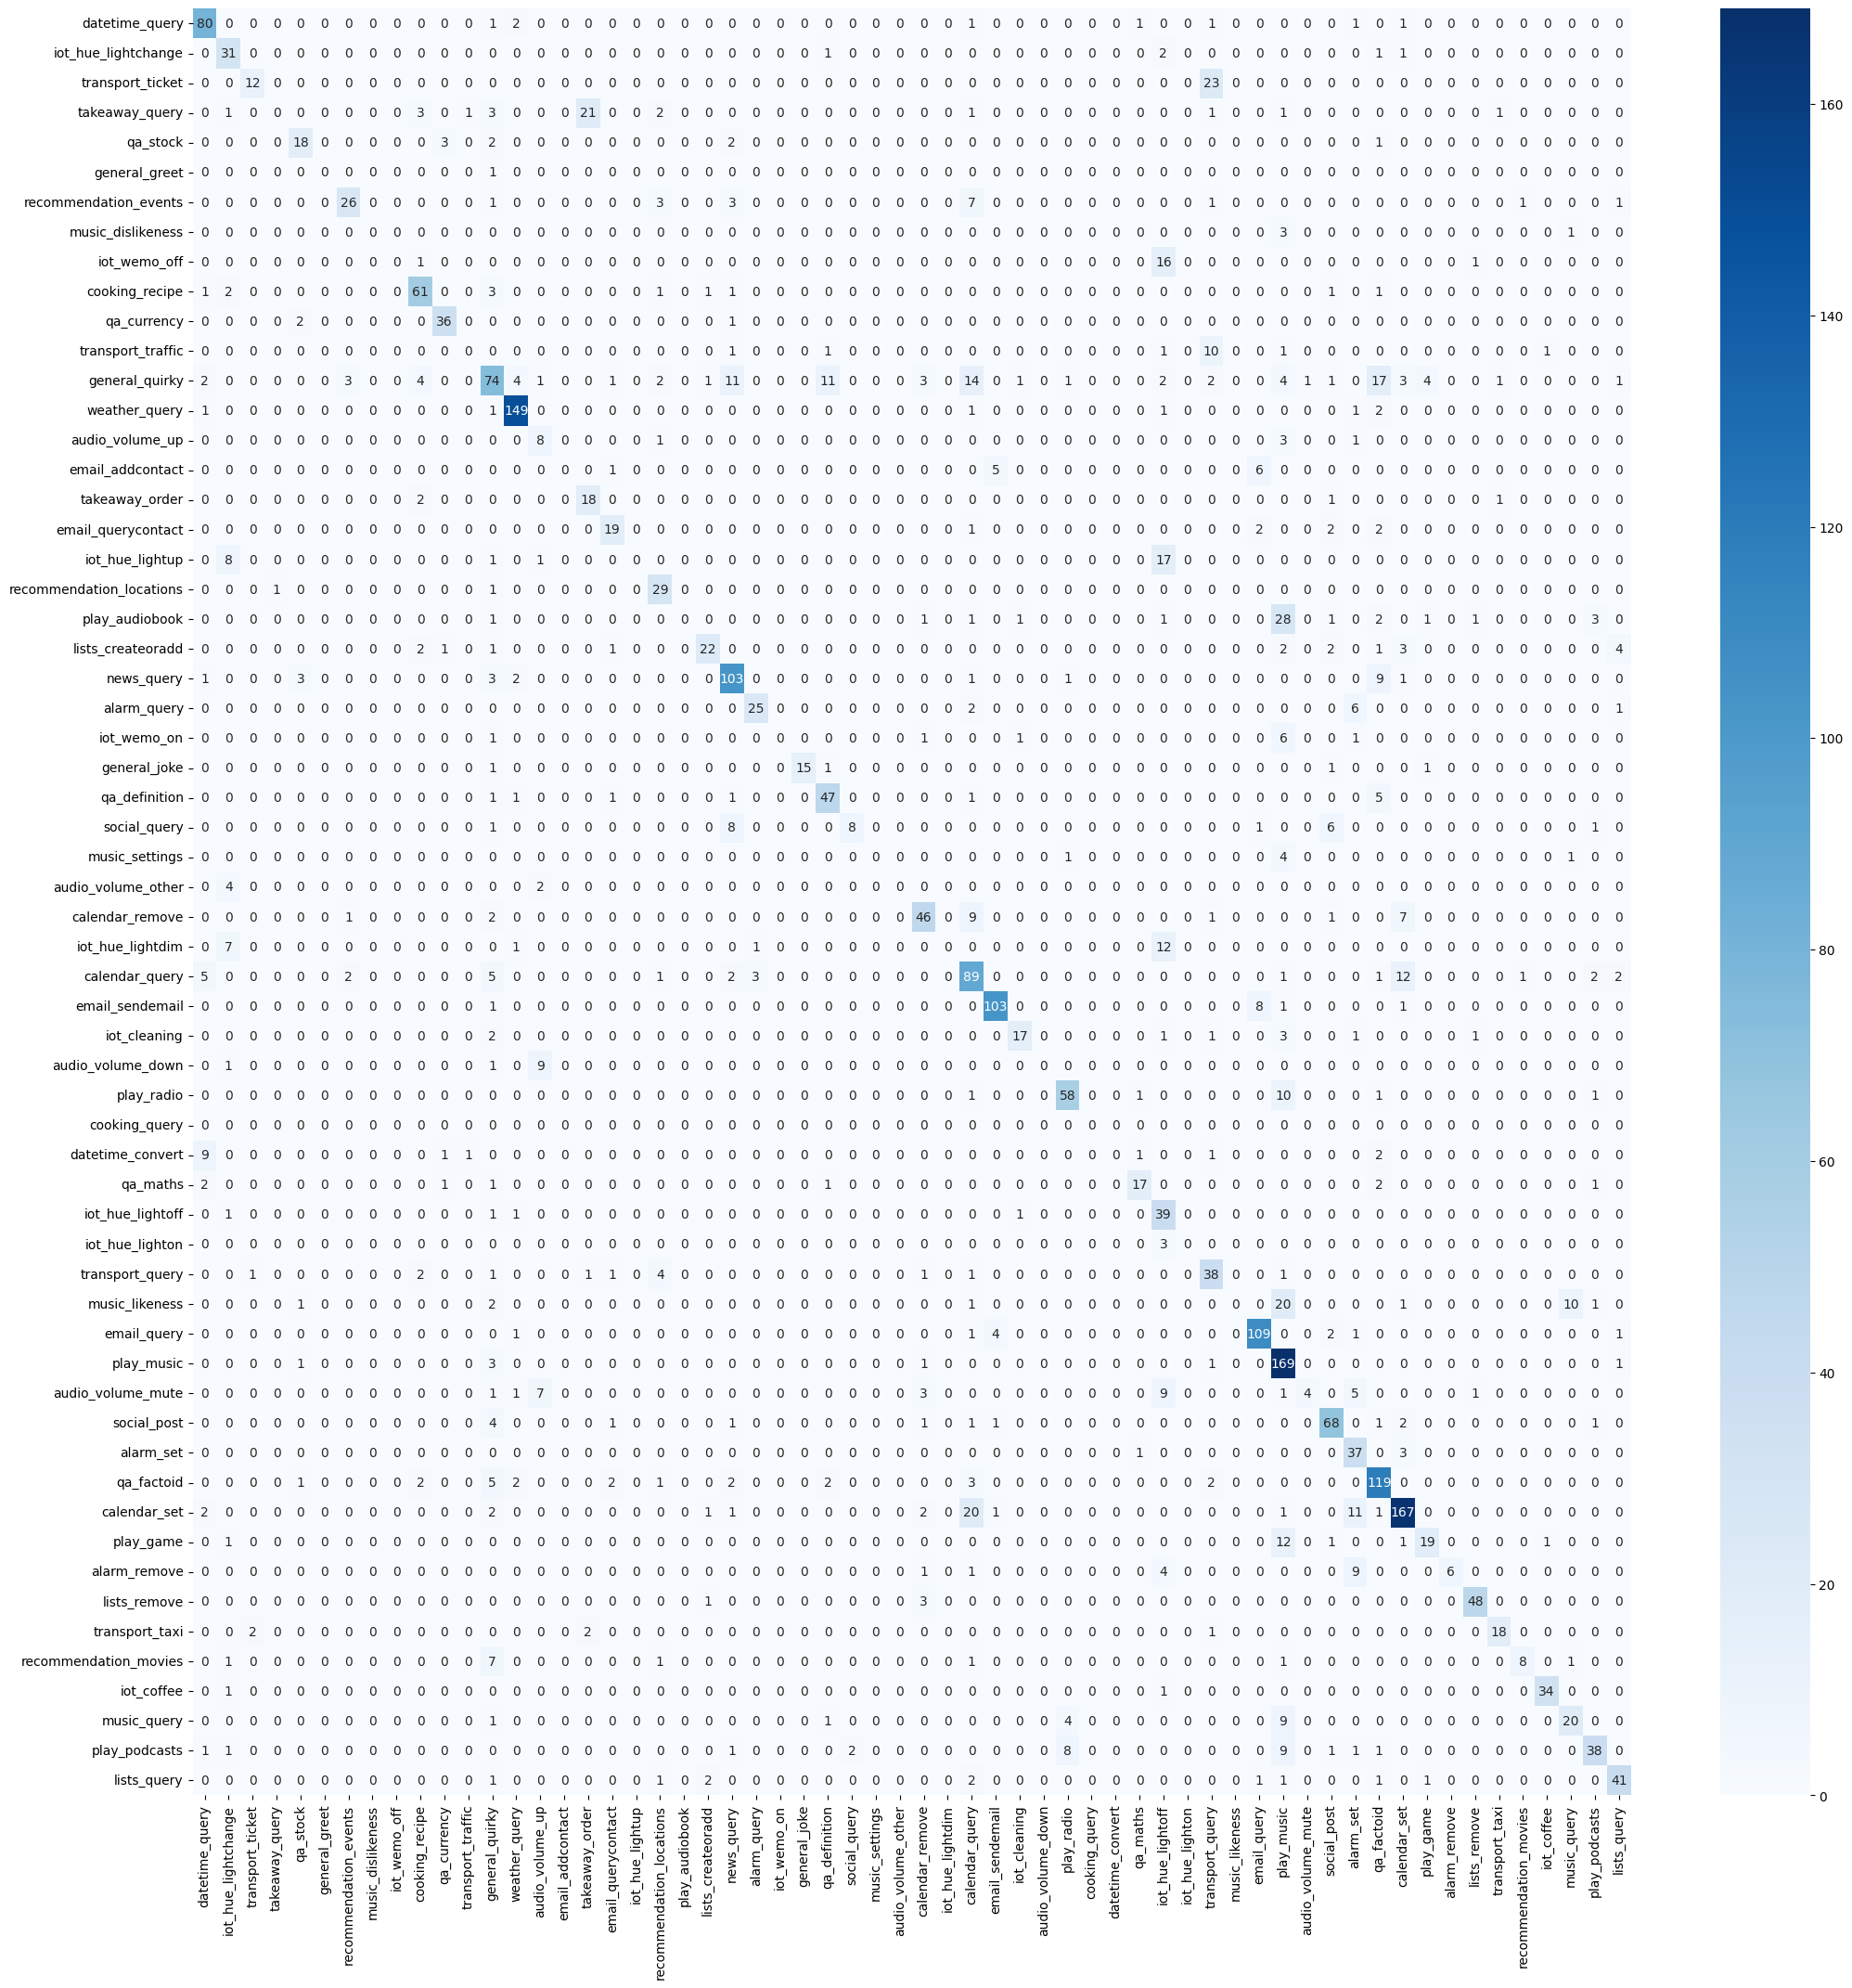

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

df_test = pd.DataFrame(test_dataset)

# Predict on the test set
test_inputs = tokenizer(df_test['text'].tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
test_labels = torch.tensor(df_test['label'].tolist())
test_inputs = {k: v.to(device) for k, v in test_inputs.items()}
test_labels = test_labels.to(device)

with torch.no_grad():
    logits = model(**test_inputs).logits

pred_labels = logits.argmax(dim=1).tolist()
true_labels = test_labels.tolist()

# Calculate metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='macro')
recall = recall_score(true_labels, pred_labels, average='macro')

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# Create a confusion matrix
conf_mat = confusion_matrix(true_labels, pred_labels, labels=list(label_dict.keys()))

# Convert confusion matrix to pandas DataFrame for visualization
conf_mat_df = pd.DataFrame(conf_mat, index=list(label_dict.values()), columns=list(label_dict.values()))

# Plot the confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(conf_mat_df, annot=True, cmap='Blues', fmt='g')

In [ ]:
#@title save arabic intent classifier
import json
from google.colab import drive
import os, glob

drive.mount('/content/drive')
folder_name="arabic intent classifier"#@param {type:"string"}
current_colab_name="making complete model using mayo clinic first aid.ipynb"#@param {type:"string"}

if 'my_path' not in locals():
    my_path = glob.glob(os.getcwd() + '/**/' + current_colab_name, recursive=True)
    my_path = [my_i for my_i in my_path if len(my_i) in [max([len(my_i) for my_i in my_path])]][0]

model_path = os.path.dirname(my_path)+"/"+folder_name

model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

with open(model_path+'/id2label.json', 'w') as fp:
    json.dump(label_dict, fp)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title load arabic intent classifier model as a pipeline
from google.colab import drive
import os, glob
from transformers import pipeline

drive.mount('/content/drive')
folder_name="arabic intent classifier"#@param {type:"string"}
current_colab_name="making complete model using mayo clinic first aid.ipynb"#@param {type:"string"}

if 'my_path' not in locals():
    my_path = glob.glob(os.getcwd() + '/**/' + current_colab_name, recursive=True)
    my_path = [my_i for my_i in my_path if len(my_i) in [max([len(my_i) for my_i in my_path])]][0]

model_path = os.path.dirname(my_path)+"/"+folder_name

classifier = pipeline(task= 'text-classification', 
                      model= model_path,
                      tokenizer = model_path)

In [ ]:
#@title load model and tokenizer

from google.colab import drive
import os, glob
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

drive.mount('/content/drive')
folder_name="arabic intent classifier"#@param {type:"string"}
current_colab_name="making complete model using mayo clinic first aid.ipynb"#@param {type:"string"}

if 'my_path' not in locals():
    my_path = glob.glob(os.getcwd() + '/**/' + current_colab_name, recursive=True)
    my_path = [my_i for my_i in my_path if len(my_i) in [max([len(my_i) for my_i in my_path])]][0]
    
model_path = os.path.dirname(my_path)+"/"+folder_name

# Load the model from the saved directory
model = TFAutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

## distinguish  between question and statment in arabic

In [ ]:
def classify_arabic(text):
    # Remove any extra whitespace from the beginning or end of the text
    text = text.strip()
    
    # Define a list of common Arabic question words
    question_words = ['من', 'ماذا', 'ما', 'أين', 'متى', 'كيف', 'لماذا', 'هل', 'ماذا', 'كم', 'أي', 'منذ', 'أيان']
    
    # Check if the text starts with a question word
    for word in question_words:
        if text.startswith(word):
            return "Question"
    
    # Check if the text ends with a question mark
    if text.endswith("؟"):
        return "Question"
    
    # If the text doesn't start with a question word or end with a question mark, classify it as a statement
    return "Statement"

In [ ]:
text = "ماذا تفعل اليوم؟"
classification = classify_arabic(text)
print(classification)  # Output: "Question"

text = "الطقس جميل اليوم"
classification = classify_arabic(text)
print(classification)  # Output: "Statement"

Question
Statement


## bert for focus classifcation

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.6 MB/s eta 0:00:00


In [ ]:
df

,question,answer,tags
0,ما هي بعض الأعراض التي تشير إلى وجود مشكلة طبي...,الصداع الذي لا يتم شرحه ، والصداع الذي يزداد س...,headache
1,متى يجب أن أطلب العناية الطبية الفورية للصداع؟,يجب عليك طلب العناية الطبية الفورية للصداع إذا...,headache
2,ما هي بعض الحالات الأخرى التي يجب أن أطلب فيها...,يجب عليك أيضًا طلب العناية الطبية إذا كان الصد...,headache
3,ماذا أفعل إذا تعرضت للعض من قبل القراد؟,قم بإزالة القراد على الفور وبعناية باستخدام مل...,tick bites
4,متى يجب علي طلب الرعاية الطارئة بعد لدغة القراد؟,اتصل بالرقم 911 أو رقم الطوارئ المحلي إذا كنت ...,tick bites
...,...,...,...
369,متى يجب عليك طلب المساعدة الطبية الفورية لجسم ...,إذا بدا أن الجسم الغريب أكثر عمقًا في الجلد أو...,foreign object in the skin
370,ماذا أفعل إذا تسربت مادة كيميائية إلى عيني؟,اغمر عينيك بماء الصنبور النظيف والفاتر لمدة 20...,chemical splash in the eye
371,ماذا علي أن أفعل بعد غسل عيني؟,اغسل يديك بالماء والصابون لإزالة أي مادة كيميا...,chemical splash in the eye
372,ماذا يجب أن أفعل إذا تسربت مادة كيميائية إلى ع...,لا تفرك عينك لأنها قد تسبب المزيد من الضرر. لا...,chemical splash in the eye


In [ ]:
df.to_csv('data.csv')

In [ ]:
#@title get device
import torch

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:
#@title useful tool
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

df = pd.read_csv('data.csv', encoding='utf-8')

lb = LabelBinarizer()

X = df['question']
y = lb.fit_transform(df['tags'])

num_classes = len(lb.classes_)

#convert back to the label
#y_pred = lb.inverse_transform(y_pred_encoded)

#----------------------------------------------------

label2id = {label: i for i, label in enumerate(train_df['tags'].unique())}
id2label = {i: label for label, i in label2id.items()}
NUM_LABELS = len(label2id)

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Load data
df = pd.read_csv('data.csv', encoding='utf-8')

# Split data into training, validation, and test sets
#train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['tags'])
#train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['tags'])

train_df, val_df = train_test_split(df, stratify=df['tags'], test_size=0.3, random_state=42)

# Define model parameters
MODEL_NAME = 'aubmindlab/bert-base-arabertv02'
NUM_LABELS = len(df['tags'].unique())

tags = df['tags'].unique()
tag_to_label = {t:i for i,t in enumerate(tags)}
label_to_tag = {i:t for i,t in enumerate(tags)}

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS, id2label= label_to_tag)

# Define encoding function
def encode(texts, max_length):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded = tokenizer.encode_plus(text, add_special_tokens=True, max_length=max_length, pad_to_max_length=True, return_attention_mask=True)
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

# Encode text data
MAX_LENGTH = 128
train_inputs = encode(train_df['question'].tolist(), MAX_LENGTH)
val_inputs = encode(val_df['question'].tolist(), MAX_LENGTH)
test_inputs = encode(test_df['question'].tolist(), MAX_LENGTH)

# Convert tag data to numerical labels

train_labels = np.array([tag_to_label[tag] for tag in train_df['tags']])
val_labels = np.array([tag_to_label[tag] for tag in val_df['tags']])
test_labels = np.array([tag_to_label[tag] for tag in test_df['tags']])

# Define training parameters
BATCH_SIZE = 32
EPOCHS = 60

# Define training callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train model
history = model.fit(train_inputs, train_labels, validation_data=(val_inputs, val_labels), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])

# Evaluate model on test set
#test_loss, test_accuracy = model.evaluate(test_inputs, test_labels, batch_size=BATCH_SIZE)
#print(f'Test loss: {test_loss}, test accuracy: {test_accuracy}')

val_loss, val_accuracy = model.evaluate(val_inputs, val_labels, batch_size=BATCH_SIZE)
print(f'Validation loss: {val_loss}, validation accuracy: {val_accuracy}')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/60


/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


9/9 [==============================] - 72s 2s/step - loss: 4.1484 - accuracy: 0.0307 - val_loss: 4.0394 - val_accuracy: 0.0177
Epoch 2/60
9/9 [==============================] - 11s 1s/step - loss: 4.0164 - accuracy: 0.0192 - val_loss: 3.9786 - val_accuracy: 0.0177
Epoch 3/60
9/9 [==============================] - 12s 1s/step - loss: 3.9100 - accuracy: 0.0421 - val_loss: 3.9088 - val_accuracy: 0.1062
Epoch 4/60
9/9 [==============================] - 12s 1s/step - loss: 3.8553 - accuracy: 0.0881 - val_loss: 3.8520 - val_accuracy: 0.1416
Epoch 5/60
9/9 [==============================] - 13s 1s/step - loss: 3.7470 - accuracy: 0.1188 - val_loss: 3.7880 - val_accuracy: 0.1239
Epoch 6/60
9/9 [==============================] - 11s 1s/step - loss: 3.6595 - accuracy: 0.1379 - val_loss: 3.7536 - val_accuracy: 0.1504
Epoch 7/60
9/9 [==============================] - 10s 1s/step - loss: 3.6469 - accuracy: 0.1379 - val_loss: 3.6813 - val_accuracy: 0.1327
Epoch 8/60
9/9 [=============================

In [ ]:
import numpy as np

# Define encoding function
MAX_LENGTH = 128
def encode(texts, max_length):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded = tokenizer.encode_plus(text, add_special_tokens=True, max_length=max_length, pad_to_max_length=True, return_attention_mask=True)
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

In [ ]:
# Predict on new data
new_texts = ['متى يتوجب عليّ طلب الرعاية الطبية الفورية بسبب الصداع؟', 'متى يتوجب عليّ طلب الرعاية الطارئة بعد لدغة القراد؟', 'ما هي الخطوات التي يجب اتباعها بعد غسل العينين؟']
new_inputs = encode(new_texts, MAX_LENGTH)
predictions = model.predict(new_inputs)
predicted_labels = np.argmax(predictions['logits'], axis=1)
predicted_tags = [label_to_tag[label] for label in predicted_labels]
print(f'Predicted tags: {predicted_tags}')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 [==============================] - 10s 10s/step
Predicted tags: ['heat cramps', 'tick bites', 'foreign object in the eye']


In [ ]:
import os, glob
import json

drive.mount('/content/drive')
folder_name="arabic_bert_model"#@param {type:"string"}
current_colab_name="making complete model using mayo clinic first aid.ipynb"#@param {type:"string"}

if 'my_path' not in locals():
    my_path = glob.glob(os.getcwd() + '/**/' + current_colab_name, recursive=True)
    my_path = [my_i for my_i in my_path if len(my_i) in [max([len(my_i) for my_i in my_path])]][0]

model_path = os.path.dirname(my_path)+"/"+folder_name

#saving trained model
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)
with open(model_path+'/id2label.json', 'w') as fp:
    json.dump(label_to_tag, fp)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title load model
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import pandas as pd
from google.colab import drive
import os, glob
import json

drive.mount('/content/drive')
folder_name="arabic_bert_model"#@param {type:"string"}
current_colab_name="making complete model using mayo clinic first aid.ipynb"#@param {type:"string"}

if 'my_path' not in locals():
    my_path = glob.glob(os.getcwd() + '/**/' + current_colab_name, recursive=True)
    my_path = [my_i for my_i in my_path if len(my_i) in [max([len(my_i) for my_i in my_path])]][0]

model_path = os.path.dirname(my_path)+"/"+folder_name

# Load the model from the saved directory
model = TFAutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

import json

# Load JSON file
with open(model_path+'/id2label.json', 'r') as f:
   label_to_tag = {int(k): v for k, v in json.load(f).items()}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Some layers from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/NLP-second term/english/making complete model using mayo clinic first aid/arabic_bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_417']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/NLP-second term/english/making complete model using mayo clinic first aid/arabic_bert_model.
If your task is simila